<a href="https://colab.research.google.com/github/Roipp16/Health-Data-Science-Repo/blob/main/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-attack-dataset-tarik-a-rashid


In [ ]:
import pandas as pd
import os
os.listdir(path)

ds=pd.read_csv(path + "/Medicaldataset.csv")
ds.shape

(1319, 9)

In [ ]:
ds.describe()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [ ]:
ds.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


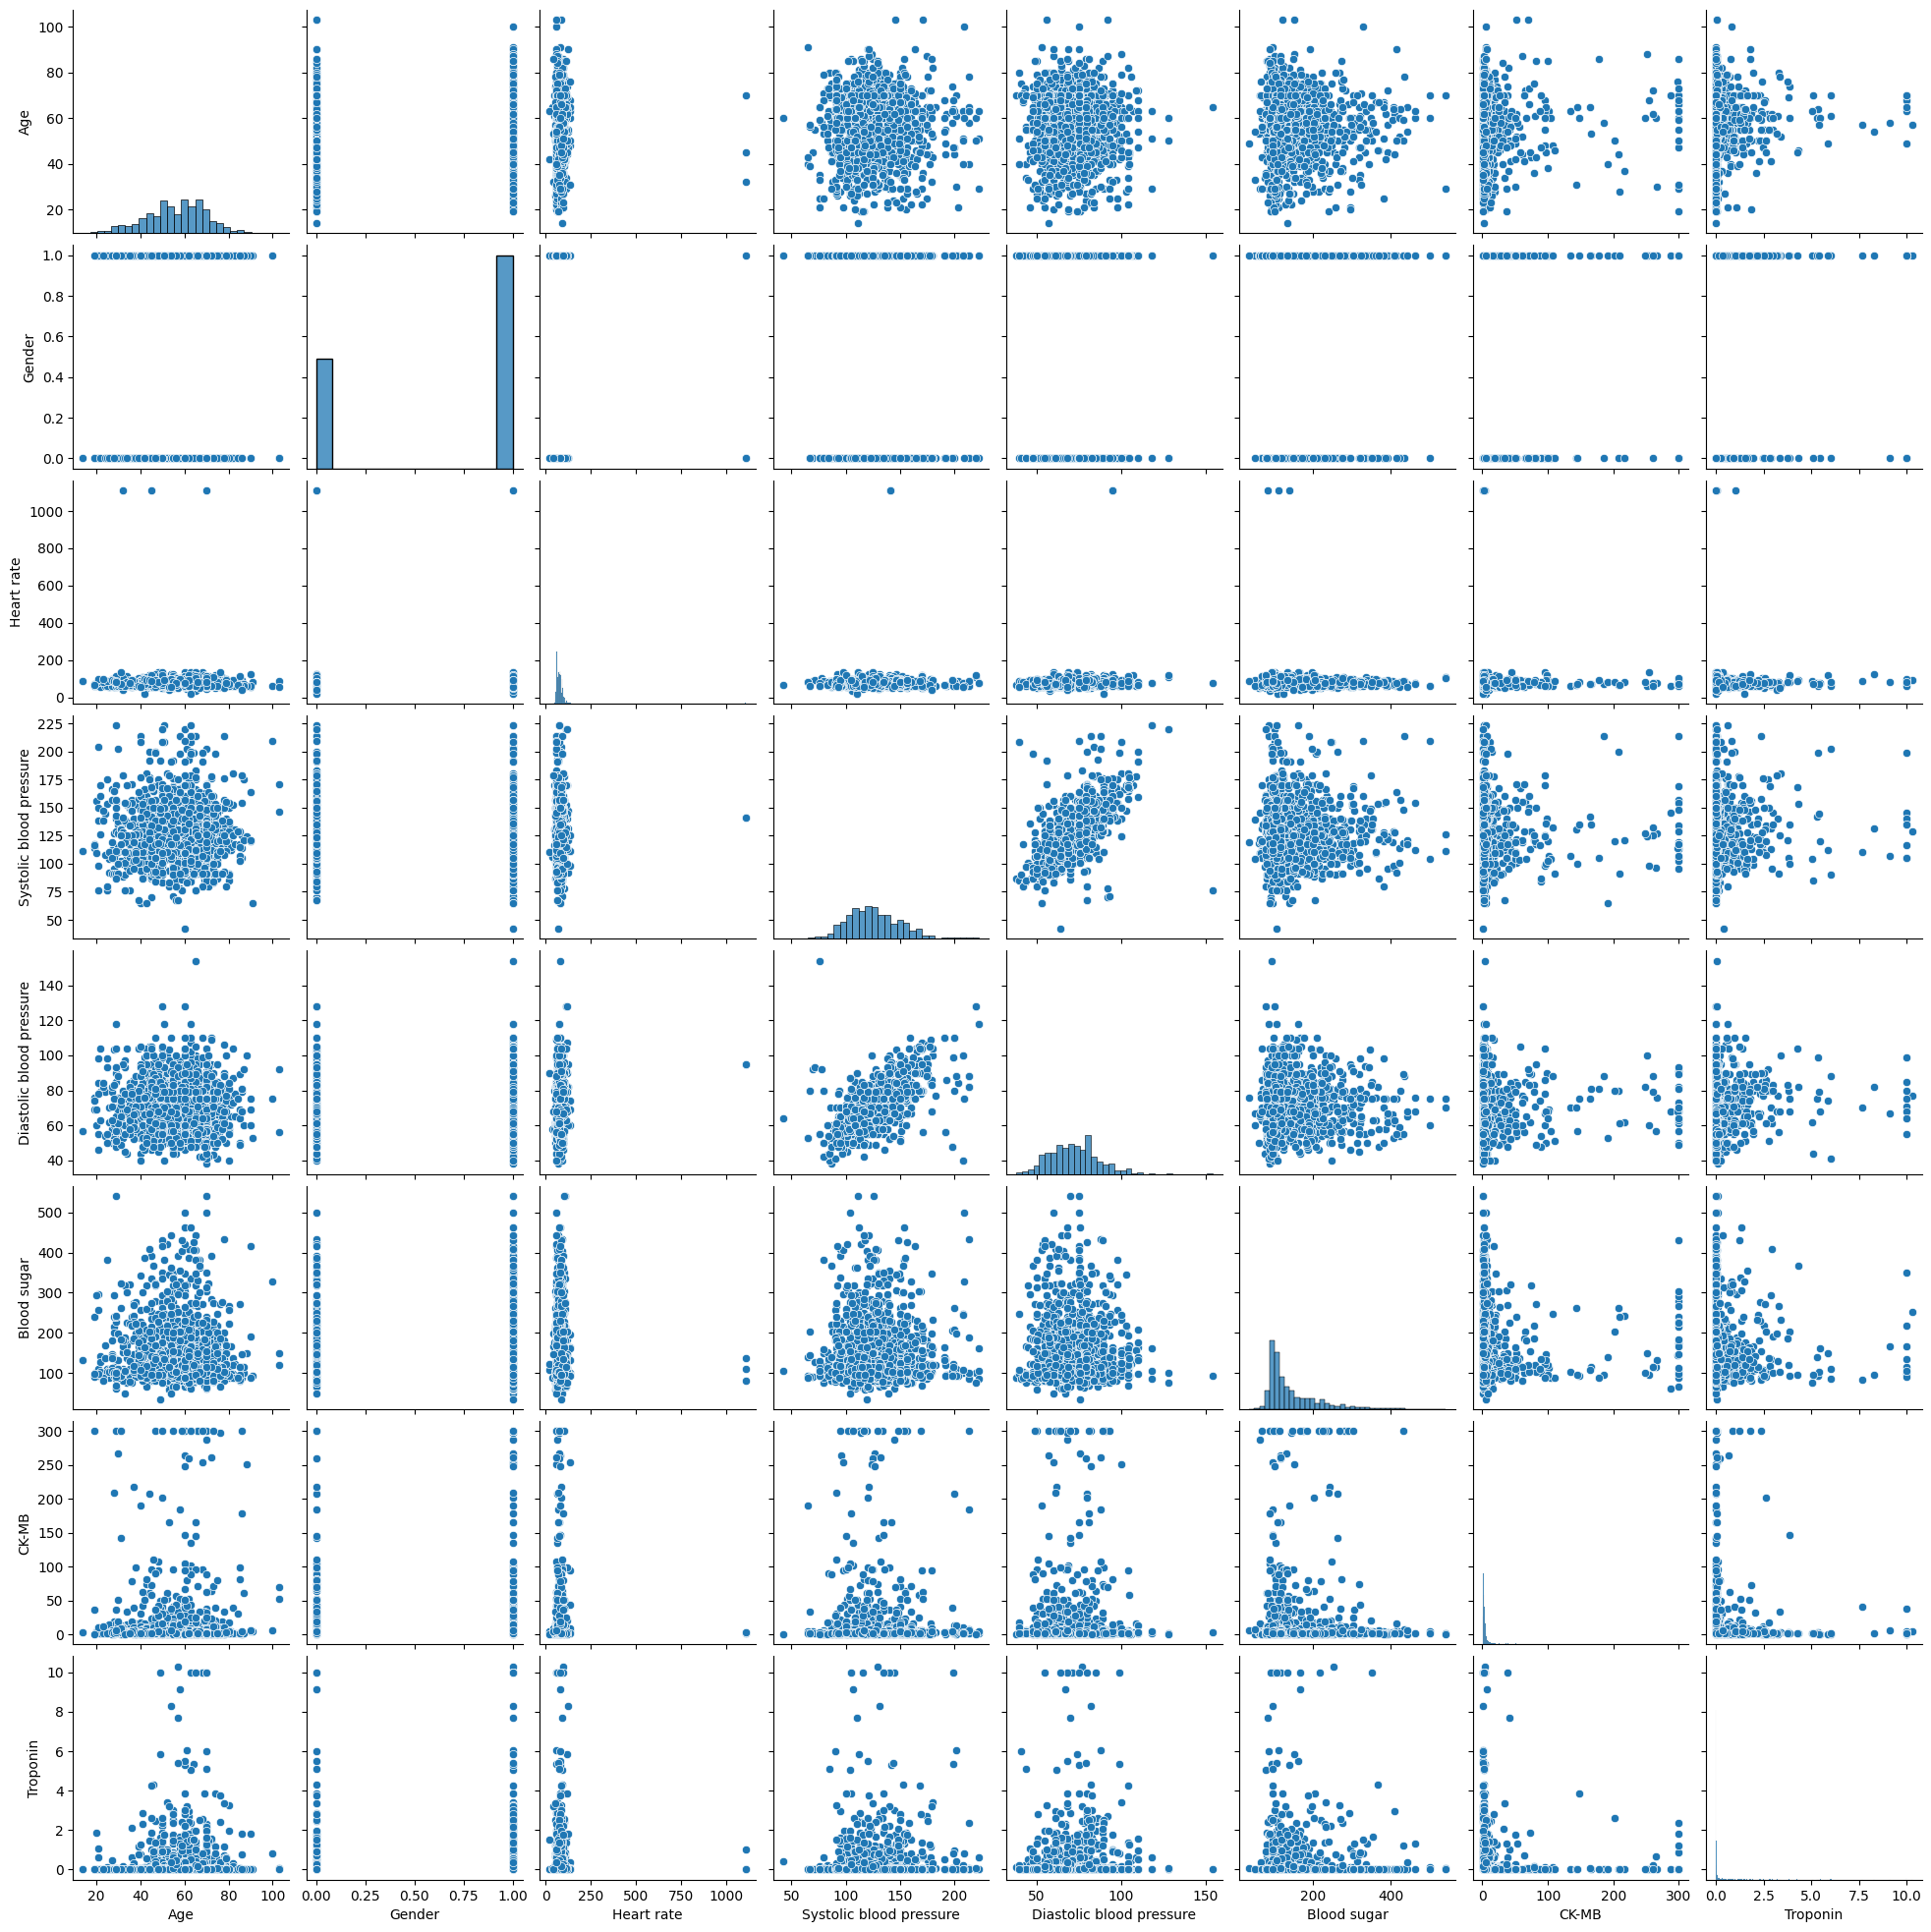

In [ ]:
import seaborn as sns
sns.pairplot(ds)


In [ ]:
ds = ds[ds["Heart rate"] < 250]
ds = ds.dropna()
ds = pd.get_dummies(df, columns=["Result"])
ds = ds.rename(columns={"Result_negative": "No_HeartD", "Result_positive": "Yes_HeartD"})
ds.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,No_HeartD,Yes_HeartD
0,64,1,66,160,83,160.0,1.80,0.012,True,False
1,21,1,94,98,46,296.0,6.75,1.060,False,True
2,55,1,64,160,77,270.0,1.99,0.003,True,False
3,64,1,70,120,55,270.0,13.87,0.122,False,True
4,55,1,64,112,65,300.0,1.08,0.003,True,False


<Axes: >

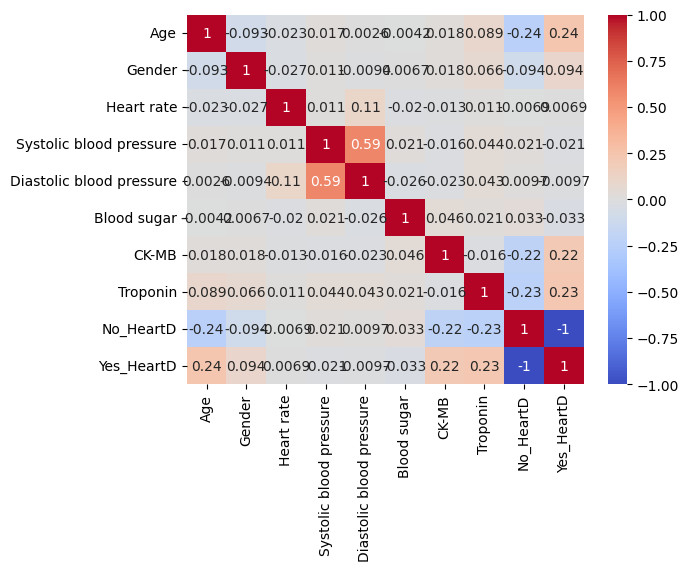

In [ ]:
corr= ds.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [ ]:
finalTest = ds.tail(200)

ds = ds.iloc[:-200]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=ds.drop(columns=["No_HeartD","Yes_HeartD"])
y=ds["Yes_HeartD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
rf_predict = rf.predict(X_test)
lr_predict = lr.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_predict)
lr_mse = mean_squared_error(y_test, lr_predict)

print("Random Forest MSE:", rf_mse)
print("Logistic Regression MSE:", lr_mse)

num_samples= 10
for i in range(num_samples):
  print(f"Random Forest Prediction: {rf_predict[i]}, Actual: {y_test.iloc[i]}")
  print(f"Logistic Regression Prediction: {lr_predict[i]}, Actual: {y_test.iloc[i]}")
  print()

rf_acc = accuracy_score(y_test, rf_predict)
lr_acc = accuracy_score(y_test, lr_predict)



Random Forest MSE: 0.022321428571428572
Logistic Regression MSE: 0.24553571428571427
Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: True, Actual: True

Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: True, Actual: True

Random Forest Prediction: False, Actual: False
Logistic Regression Prediction: False, Actual: False

Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: True, Actual: True

Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: True, Actual: True

Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: True, Actual: True

Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: False, Actual: True

Random Forest Prediction: True, Actual: True
Logistic Regression Prediction: True, Actual: True

Random Forest Prediction: False, Actual: False
Logistic Regression Prediction: True, Actual: False

Random Forest Prediction: True, Ac

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, verbose=1)

loss, acc = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4565 - loss: 0.7645
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4724 - loss: 0.7241
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5630 - loss: 0.6741
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6228 - loss: 0.6521
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - loss: 0.6300
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6713 - loss: 0.6169
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6754 - loss: 0.5993
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6964 - loss: 0.5918
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7185 - loss: 0.5724  
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6757 - loss: 0.5840 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6556 - loss: 0.5741  
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
print(f"DL Accuracy: {acc:.4f}")
print(f"DL RMSE: {rmse:f}")

print(f"Rf RMSE: {rf_mse}")
print(f"Rf Accuracy: {rf_acc:.4f}")

print(f"LR RMSE: {lr_mse}")
print(f"LR Accuracy {lr_acc:.4f}")


DL Accuracy: 0.6786
DL RMSE: 0.449321
Rf RMSE: 0.022321428571428572
Rf Accuracy: 0.9777
LR RMSE: 0.24553571428571427
LR Accuracy 0.7545


In [ ]:
x_final = finalTest.drop(columns=["No_HeartD","Yes_HeartD"])
y_final = finalTest["Yes_HeartD"]
x_final = scaler.transform(x_final)

final_testing_predictions= rf.predict(x_final)

final_test_accuracy = accuracy_score(y_final, final_testing_predictions)

print(f"Final Test Accuracy: {final_test_accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_final, final_testing_predictions))

print("\nConfusion Matrix:\n", confusion_matrix(y_final, final_testing_predictions))


Final Test Accuracy: 0.9950

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      0.99        77
        True       0.99      1.00      1.00       123

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200


Confusion Matrix:
 [[ 76   1]
 [  0 123]]


This has been some code for Heart Disease predictor. We now would have to test with real world data, since the best model, the RF model, seems too good to be true.
Testing with real data could determine its acceptance.